<a href="https://colab.research.google.com/github/leonnmarcoo/CCMACLRL_EXERCISES_COM232/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [ ]:
df = pd.read_csv('igfriends.csv')

In [ ]:
df.head()

,Name,Posts/Shares Frequently,Active,Replies to comments,# of followers,Personality
0,Ariane Gutierrez,1,1,1,17400,1
1,Atashia Canoza,0,1,1,602,0
2,Eshe Cruz,0,1,1,440,0
3,Ryllee Lacson,0,1,1,1216,0
4,Andrei Samson,0,0,0,92,0


Display the summary of all the features of the dataset using `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     100 non-null    object
 1   Posts/Shares Frequently  100 non-null    int64 
 2   Active                   100 non-null    int64 
 3   Replies to comments      100 non-null    int64 
 4   # of followers           100 non-null    int64 
 5   Personality              100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [ ]:
df['Personality'].value_counts()

,count
Personality,
1,54
0,46


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

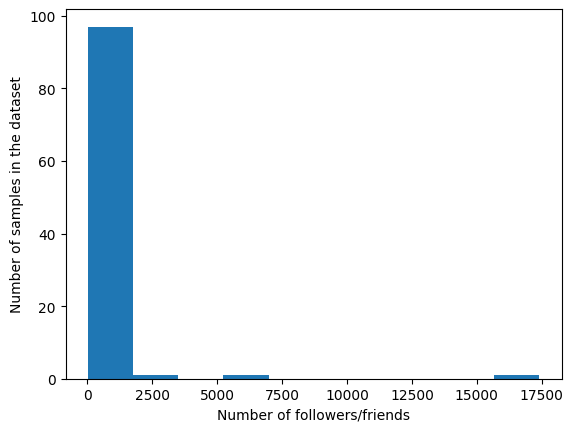

In [ ]:
plt.hist(df["# of followers"])
plt.xlabel("Number of followers/friends")
plt.ylabel("Number of samples in the dataset")
plt.show

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [ ]:
df.drop(columns='Name', inplace=True)

x = df.drop(columns=['Personality']).values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [ ]:
y = df['Personality'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

Display the dimensions of each variables using `.shape()`

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)

Train the model using the `.fit()`

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Test the model using the `.predict()`

In [ ]:
y_pred = knn.predict(x_test)

## E. Evaluate the model

Create a confusion matrix

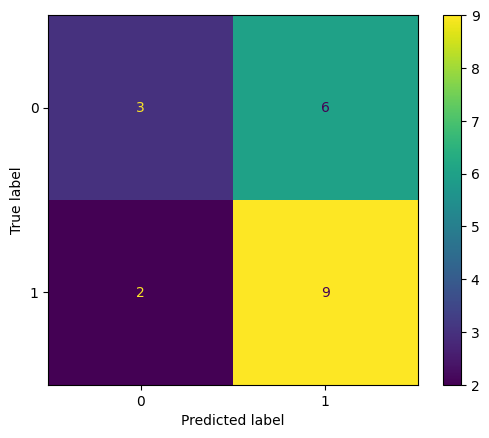

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.6

Display the precision

In [ ]:
precision = precision_score(y_test, y_pred, average=None)
print("Precission:", precision)

Precission: [0.33333333 0.81818182]


Display the recall

In [ ]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.6 0.6]


Display the f1-score

In [ ]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.42857143 0.69230769]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [ ]:
knn.predict([[1, 1, 1, 326]])

array([0])